### Cross-Validation

In [18]:
df = pd.read_csv("Datasets/winequality-red.csv", delimiter=';')

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
df.shape

(1599, 12)

In [22]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [23]:
# A Mapping Dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

In [24]:
df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [26]:
# Splitting the Data of 1599 Samples to 1000 Training and 599 as a Separate Test

# We Sample with frac=1 to shuffle the dataframe, we reset the indices since they change after shuffling the dataframe.
df = df.sample(frac=1).reset_index(drop=True)

# Top 1000 rows are selected for Training
df_train = df.head(1000)

# Bottom 599 rows are selected for Testing/Validation
df_test = df.tail(599)

In [32]:
# We will now train a Decision Tree Model on the Training Set. For the Decision Tree Model, I am going to use Scikit-Learn

from sklearn import tree, metrics

# Selecting All Features Except Target
cols = np.array(df.columns[:-1])

# Initialize DT Classifier with a Max_Depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# Train the model on the Provided features
clf.fit(df_train[cols], df_train['quality'])

DecisionTreeClassifier(max_depth=3)

In [33]:
# Generate Predictions on the Training Set
train_predictions = clf.predict(df_train[cols])

# Generate Predictions on the Testing Set
test_predictions = clf.predict(df_test[cols])

# Calculate the accuracy of predictions on Training Dataset
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# Calculate the accuracy of predictions on Testing Dataset
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [35]:
print(f"Training Accuracy: {train_accuracy*100:.3f}%")
print(f"Testing Accuracy: {test_accuracy*100:.3f}%")

Training Accuracy: 57.500%
Testing Accuracy: 56.928%


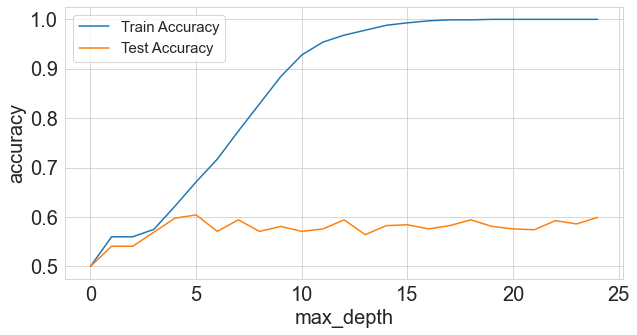

In [37]:
# Let's Calculate Accuracies for different values for max_depth and Make a Plot

# Imports
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, metrics

# Global Size of Label Text on the Plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
%matplotlib inline

# Initialize lists to store accuracies for training and test data
train_accuracies = [0.5]
test_accuracies = [0.5]

# Columns/Features for Training
cols = np.array(df.columns[:-1])

# Iterate over a few depth values
for depth in range(1, 25):

    # Initialize the Model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # Fit the Model on Given Features
    clf.fit(df_train[cols], df_train.quality)
    
    # Create Training and Test Predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # Calculate Training and Testing Accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # Append Accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# Create Two Plots using Matplotlib and Seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend(loc='best', prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()